In [2]:
import numpy as np
import cv2
import copy
from matplotlib import pyplot as plt

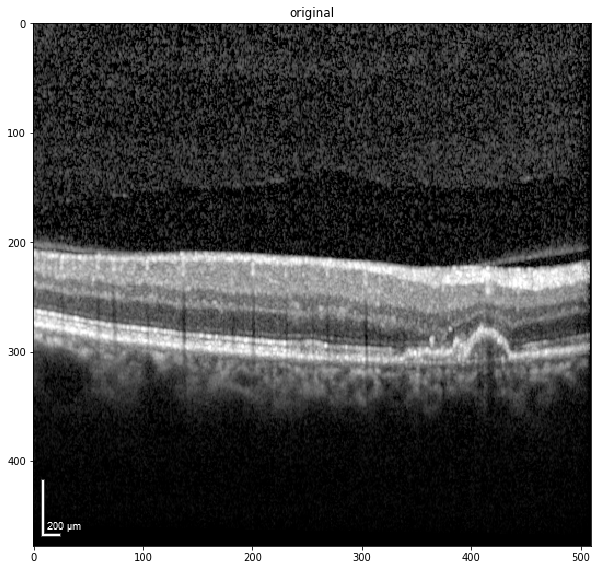

In [6]:
img = cv2.imread('data/train_noise/91_OD_03052011_17_oct.png')
#img = cv2.imread('data/train/45_OD_04042019_2_oct.png')
#img = cv2.imread('data/train/x_219_OD_01.png')
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
implt = cv2.cvtColor(grey, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10)),plt.imshow(implt),plt.title('original')#,plt.show()
plt.savefig('max_orig.pdf')

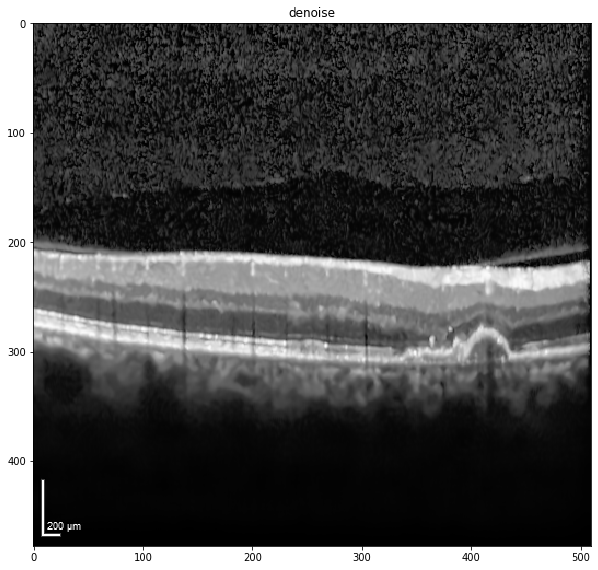

(<Figure size 720x720 with 1 Axes>,
 Text(0.5, 1, 'denoise'),
 None)

In [7]:
denoise = cv2.fastNlMeansDenoising(grey, None, 11, 5, 19)
implt = cv2.cvtColor(denoise, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10)),plt.imshow(implt),plt.title('denoise'),plt.show()

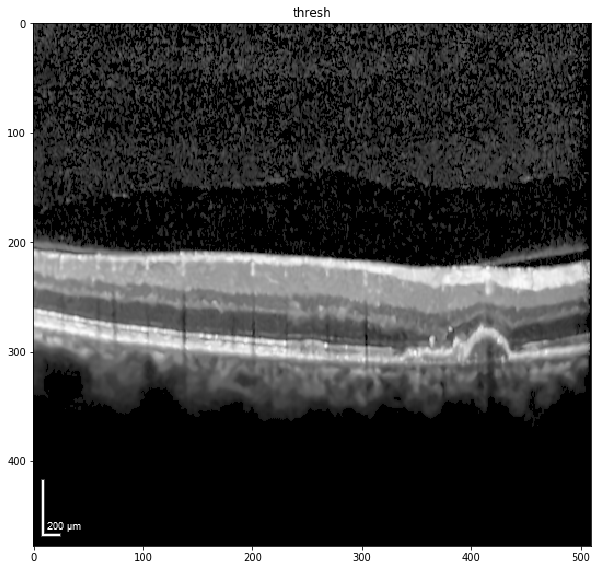

In [8]:
ret, thresh = cv2.threshold(denoise,25,255,cv2.THRESH_TOZERO)
implt = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10)),plt.imshow(implt),plt.title('thresh')#,plt.show()
plt.savefig('max_thresh.pdf')

366
358.5


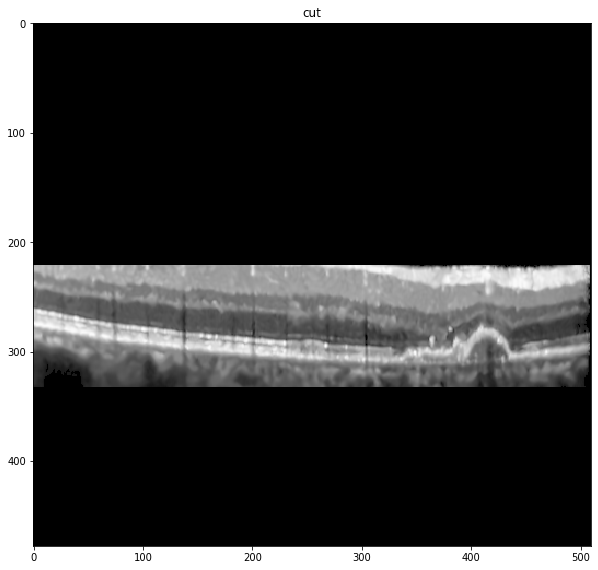

In [9]:
clean = copy.copy(thresh)
clean_counter = 0
for i,row in enumerate(clean):
    l = len(row)
    unique, counts = np.unique(row, return_counts=True)
    d = dict(zip(unique, counts))
    n_zeros = d[0]
    if n_zeros > 50:
        clean[i,:] = 0
        clean_counter += 1
print(clean_counter)
print(clean.shape[0]/4*3)
if clean_counter > clean.shape[0]/100*85:
    clean = thresh
implt = cv2.cvtColor(clean, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10)),plt.imshow(implt),plt.title('cut')#,plt.show()
plt.savefig('max_cut.pdf')